<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">



# <center> **09. Machine learning: an introduction!** </center>


## **Outline**

1. [**Naive Bayes in deep**](#eje1)
2. [**Metrics and Evaluation on classification**](#eje2)
    

In [ ]:
import os
from google.colab import drive

path_ai = "Academia40/Notebooks"
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Academia40/Notebooks


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

# **3. The Naive Gaussian Bayes in deep** <a name="eje1"></a>

Given a new sample $x$ for which we do not know its class, Naive Bayes works as follows to estimate it:
    
- Estimate $P(0|x)$ and $P(1|x)$, the probability of the class being 0 or 1 given the piece of data that we have now ($x$)
- Choose the one with highest probability.

Stop and think from a Bayesian perspective. What information we had before seeing $x$?

Using Bayes:

$$P(0|x) = \frac{P(x|0) P(0)}{P(x)} \;\;\;\;\;\;\;\;P(1|x) = \frac{P(x|1) P(1)}{P(x)}$$

- $P(0)$ and $P(1)$ is the probability of a class. For instance, which is the probability to have cancer? or which is the probability of autheticate money?
- $P(x|0)$ is the probability of our new sample $x$ belonging to class 0. $P(x|1)$ likewise for class 1.
- $P(x)$ is the absolute probability of $x$.

How can we compute each term so that we can estimate $P(0|x)$ and $P(1|x)$?

- for $P(0)$ and $P(1)$ we can use the frequencies of appearance observed in our dataset
- for $P(x|0)$ (or $P(x|1)$ we do not know their distributions (their shape in the charts above). We can **assume they are Gaussian** and use the corresponding PDF to compute probabilities.
- $P(x)$ is very hard, but we do not really need it as it is a common factor of $P(0|x)$ and $P(1|x)$, $\in [0,1]$, and we are only interested in their comparison.

Now, for the Gaussian PDF of $P(x|0)$ we need two parameters: $\mu_0$ and $\sigma_0$, which we can estimate using the corresponding items from our dataset.

Let's say our new sample has a particular value. Now, we estimate $P(0)$ and $P(1)$, must correspond to the observed frequencies of our classes




build the corresponding PDFs for each class using our dataset

- Why this classifier is **Naive**?
- Why this classifier is **Naive Gaussian Bayes** ?
- How it works with different features?



## **Advantages of NGB**

- An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification

-  A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

- It is not necessary the computation of covariance matrix

## **Go to real-life!**

see dataset description at:   

load a dataset

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

(1372, 5)
(1372, 4) (1372,)


,varwt,skewt,curwt,entrwt,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


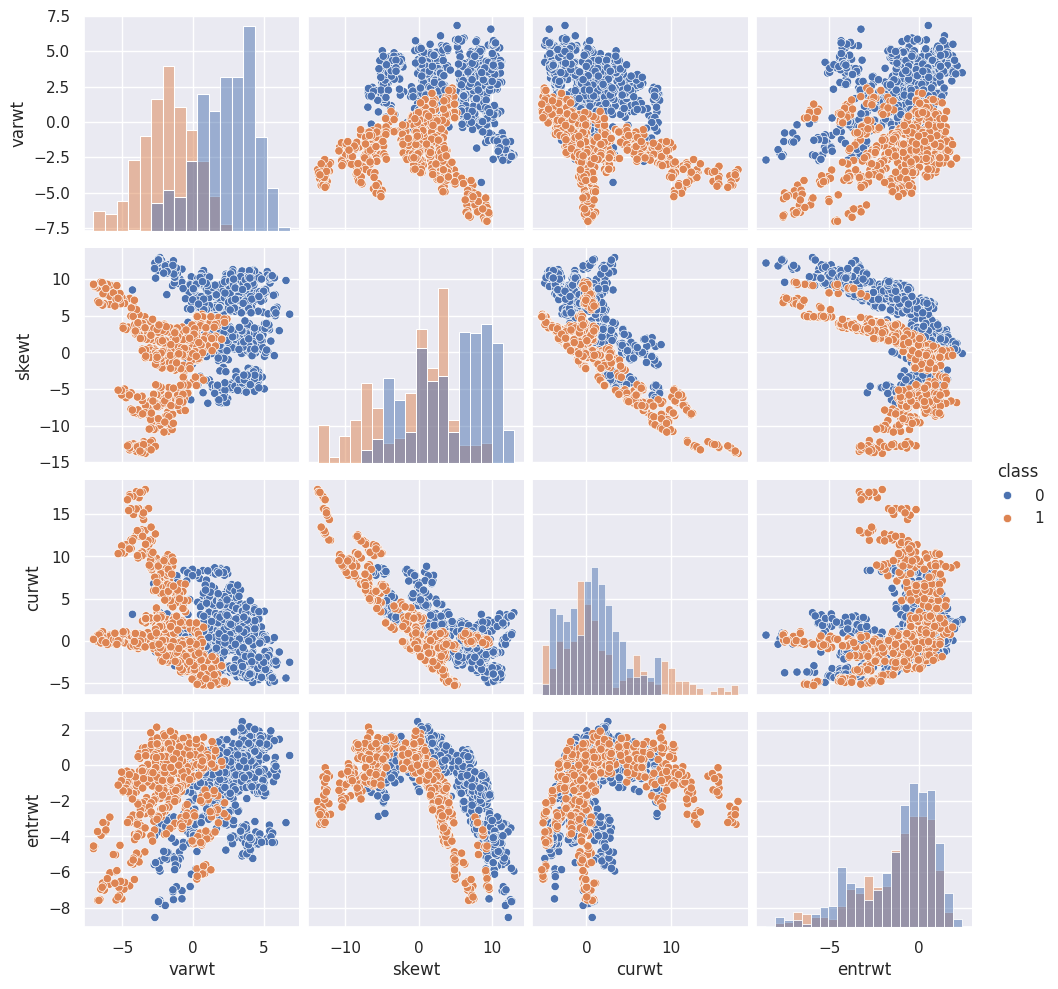

In [ ]:
#@title **code** To read the dataset
## Dataset usando pandas
d = pd.read_csv("data/Copy of data_banknote_authentication.txt.gz")

# Imprimos la forma del dataset (el shape)
print(d.shape)

## Extraemos las características en forma de array
X = d.values[:,:-1]

# Extraemos las etiquetas en forma de array
y = d.values[:,-1]

## Generar un paiplot, con el dataset d, el color (hue) es la clase, y la diagonal (diag_kind) será de tipo histograma
sns.pairplot(d, hue="class", diag_kind="hist");# kind="kde"

## Imprimir la estructura o forma de las características (X) y las etiquetas (y)
print(X.shape, y.shape)

## Mostramos solo los primeros 5 datos de nuestro dataframe d
d.head()

In [ ]:
#@title  **code** Typical split. Is it sufficient?
## 1. Importar el modelo desde sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## Seaprar los datos en datos de entrenamiento y en datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Inicializamos GNB
est = GaussianNB()

## Entrenamos el modelo
est.fit(X_train,y_train)

## Y utilizando el dataset prueba... EVALUAMOS EL MODELO.
print("%.3f"%accuracy_score(est.predict(X_test), y_test))

0.811


# **2. Metrics and Evaluation on classification** <a name="eje2"></a>

Let's use cross validation and build more confidence in our results

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/kfold.jpg" style="width:400px;">

In [ ]:
#@title **code:** cross-validation
from sklearn.model_selection import cross_val_score

## definimos el modelo

est = GaussianNB()

## Entrenar con cross-val score
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))

## imprimos el accuracy
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.81884058 0.85507246 0.80291971 0.83941606 0.87591241 0.86131387
 0.83211679 0.83941606 0.80291971 0.87591241]
accuracy 0.840 (+/- 0.02553)


let's understand better how this estimator is performing.

- TPR: true positive rate (sensitivity), e.g.,  the percentage of sick people who are correctly identified as having the condition
- TNR: true negative rate (specificity), e.g., the percentage of healthy people who are correctly identified as not having the condition

From Wiki:

- True positive: Sick people correctly identified as sick
- False positive: Healthy people incorrectly identified as sick
- True negative: Healthy people correctly identified as healthy
- False negative: Sick people incorrectly identified as healthy

In general

- True positive = correctly identified
- False positive = incorrectly identified
- True negative = correctly rejected
- False negative = incorrectly rejected

In [ ]:
est.fit(X,y)

p = est.predict(X)

np.mean(p[y==0] == y[y==0])

0.8805774278215223

In [ ]:
#@title **code** other metrics
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [ ]:
#@title **code** we can obtain performance with different metrics
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print ("tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print ("tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

tpr 0.790 (+/- 0.04538)
tnr 0.877 (+/- 0.03505)


## **A classification report**

We can summarize performance by computing some different metrics with sklearn

In [ ]:
#@title **code** classification report

## Importar el classification_report
from sklearn.metrics import classification_report

## Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Definimos el modelo
est = GaussianNB()

## Entrenamos el modelo
est.fit(X_train,y_train)

## Obtenemos las predicciones con el dataset de prueba
y_pred = est.predict(X_test)

## Imprimir el report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       235
         1.0       0.81      0.80      0.81       177

    accuracy                           0.83       412
   macro avg       0.83      0.83      0.83       412
weighted avg       0.83      0.83      0.83       412



#CHALLENGE

- Now, we will work with the **Dataset de cancer de mama**
- use the  sklearn: `from sklearn.datasets import load_breast_cancer`
- To get a classifier using a particular partition (train=80, test=20)
- To do a classifier using a K-fold of 10
- We can explore for small datasets the leave-one patient out. To do a evalaution using this thecnique.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0


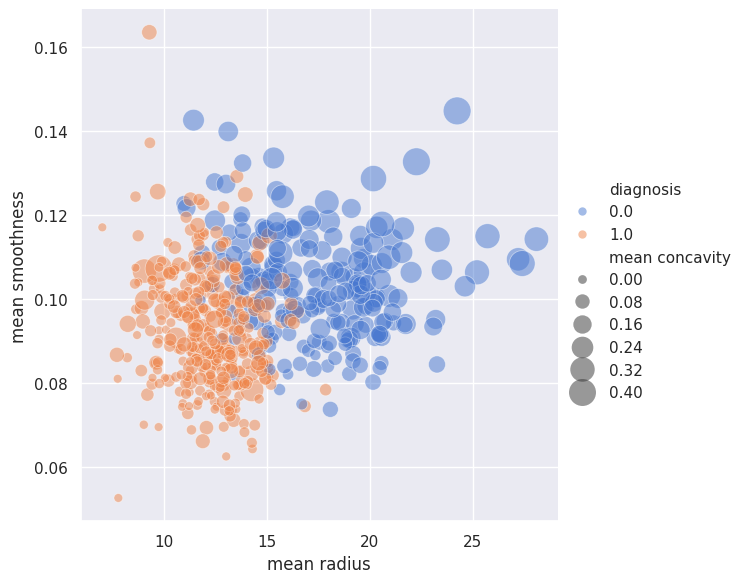

In [ ]:
#@title **Breast cancer dataset**
variable_x = "mean radius"
variable_y = "mean smoothness"
variable_s = "mean concavity"


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## importar dataset
from sklearn.datasets import load_breast_cancer


## Cargar dataset
cancer = load_breast_cancer()

data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#@title **code student**




In [15]:
#@title **Answer**
X = data_bc.values[:,:-1]
y = data_bc.values[:,-1]

## split and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

print('Shape X_train: ',np.shape(X_train),', and shape y_train: ',np.shape(y_train))
print('Shape X_test: ',np.shape(X_test),', and shape y_test: ',np.shape(y_test))

## create GNB model
est = GaussianNB()

## Make a kfold
s = cross_val_score(est, X, y, cv=KFold(20, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Shape X_train:  (455, 30) , and shape y_train:  (455,)
Shape X_test:  (114, 30) , and shape y_test:  (114,)
[0.86206897 0.89655172 0.96551724 1.         0.89655172 1.
 0.96551724 0.89655172 0.82758621 0.92857143 1.         0.92857143
 1.         0.96428571 0.96428571 0.85714286 1.         1.
 0.89285714 0.92857143]
accuracy 0.939 (+/- 0.05381)


# **References**

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
